#### ALFIDO TECH INTERNSHIP TASK NO 2 :

# IRIS FLOWER CLASSIFICATION

### PROBLEM STATEMENT
Iris Flower Classification is a classic machine learning task used for learning and practicing classification algorithms. The dataset contains features like sepal length, sepal width, petal length, and petal width for three different species of iris flowers. The goal is to build a model that can classify iris flowers into their respective species based on these features.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("\\Users\\gaurav\\Downloads\\archive (1)\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### DATA VISUALIZATION

<AxesSubplot:xlabel='species', ylabel='count'>

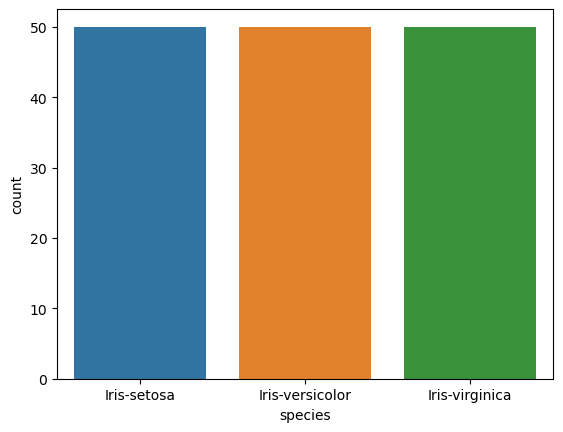

In [9]:
sns.countplot(x=df["species"])

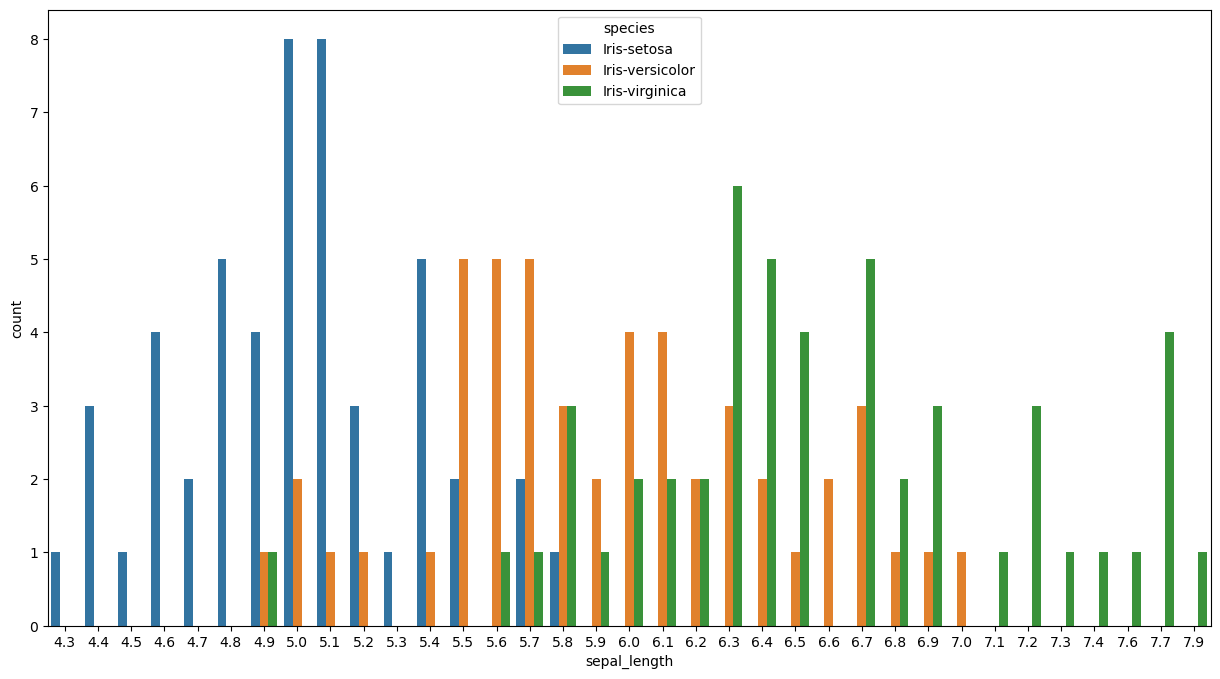

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_length',data=df,hue='species')
plt.show()

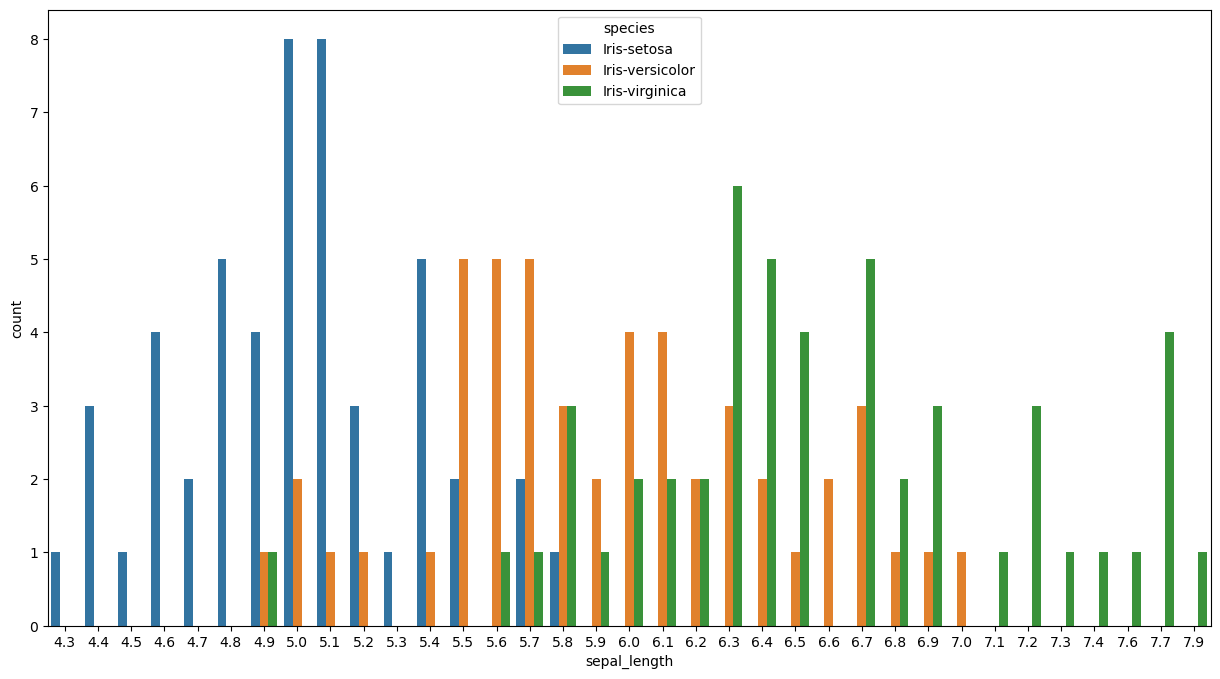

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_length',data=df,hue='species')
plt.show()

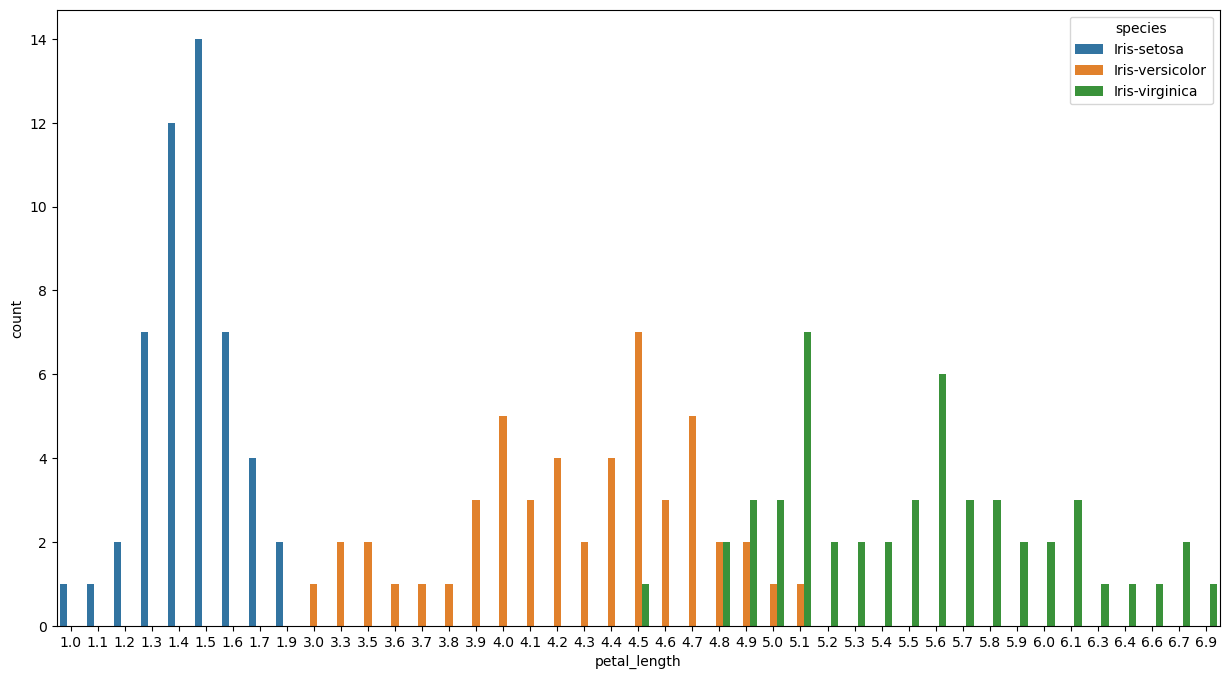

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x="petal_length",data=df,hue='species')
plt.show()

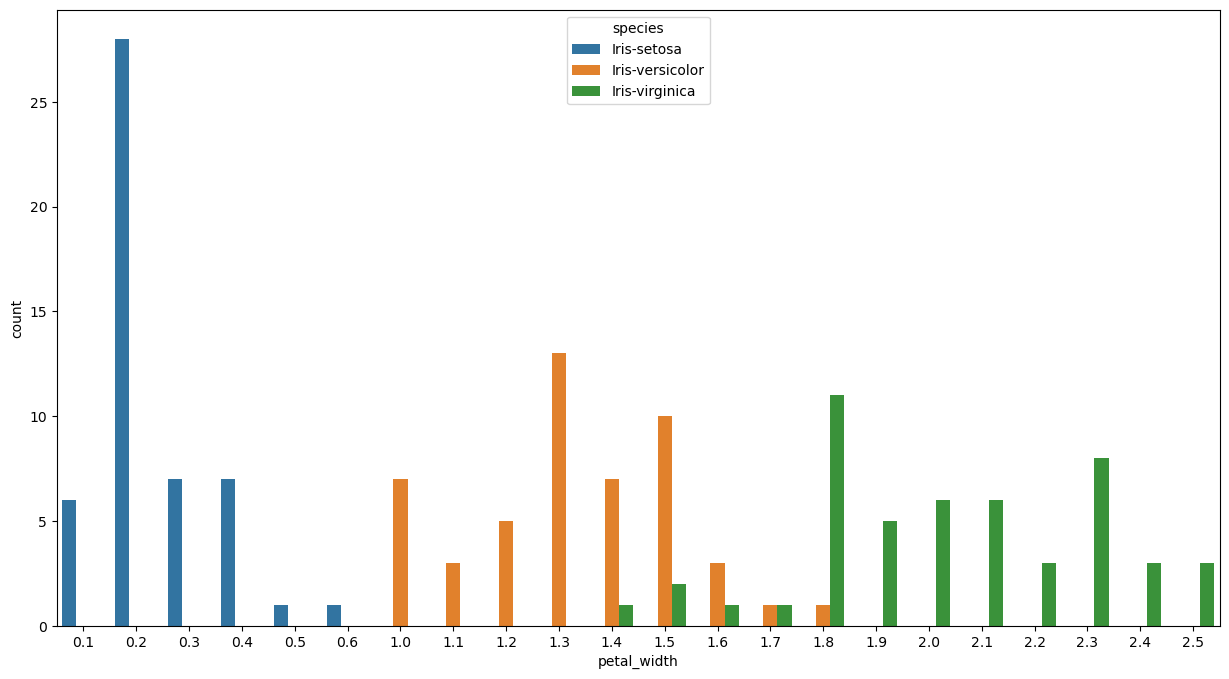

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x="petal_width",data=df,hue='species')
plt.show()

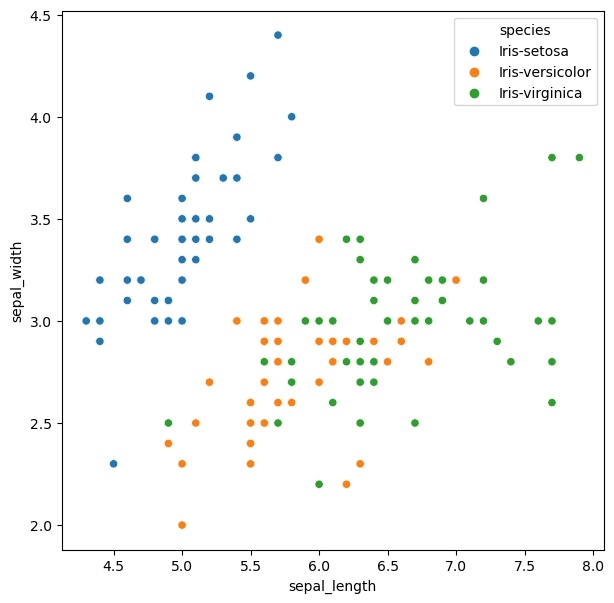

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')
plt.show()

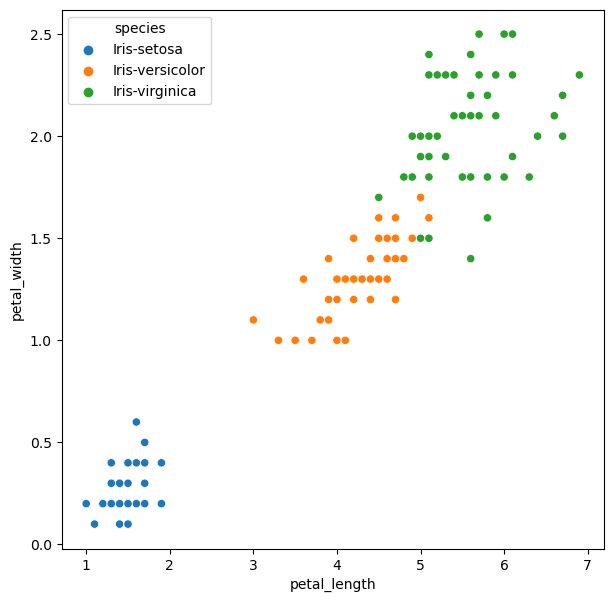

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species")
plt.show()

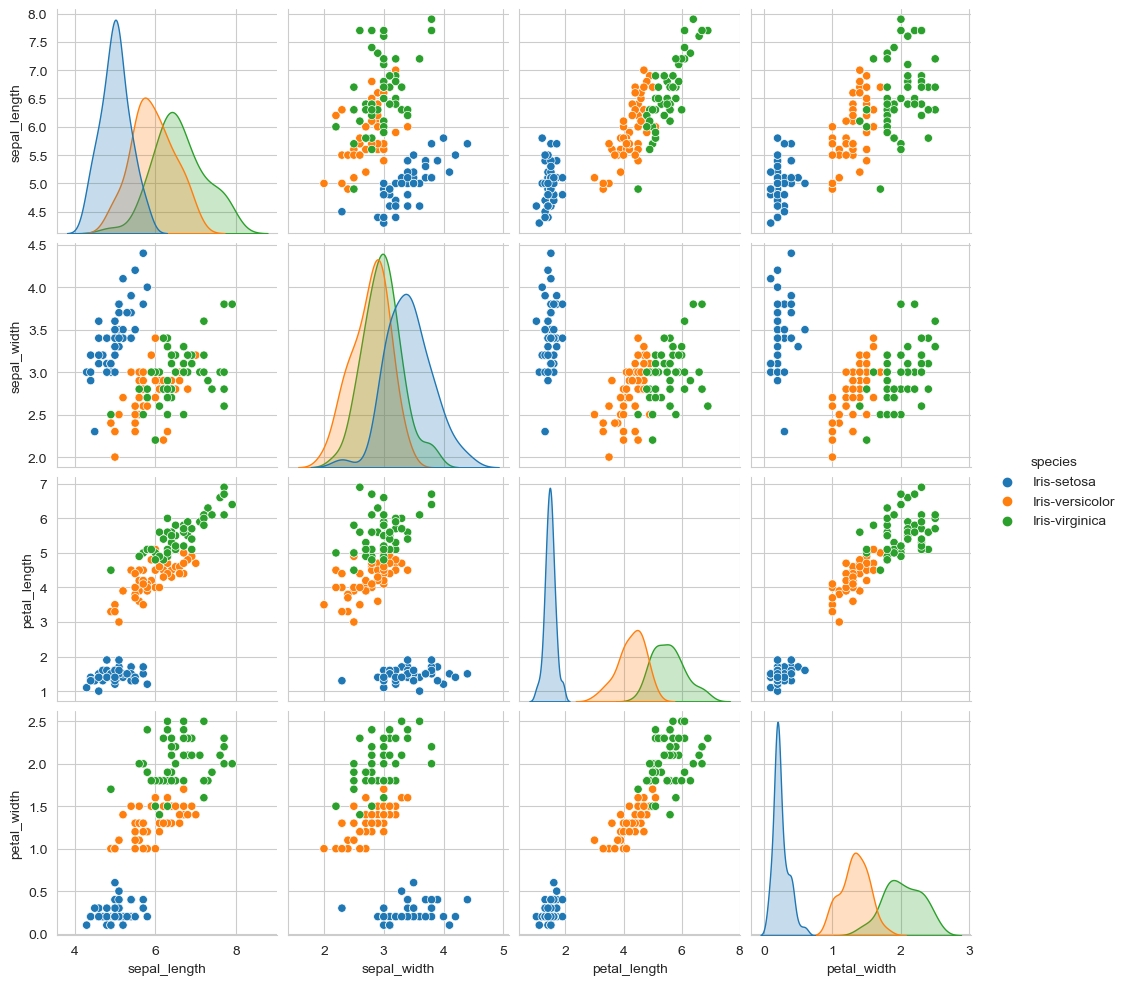

In [16]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='species')
plt.show()

### OBSERVATIONS


petal_length and petal_width are most useful feature to separate the various flower types
While setosa can be easily separated(linearly separable),virnica and versicolor have some overlap(almost linearly separable)

### MODEL SELECTION

In [17]:
X=df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y=df[['species']]
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


##### Checking model accurancy using cross validation

In [19]:
key= ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB']
value=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'KNeighborsClassifier': KNeighborsClassifier(), 'GaussianNB': GaussianNB()}


In [20]:
predicted=[]
for name,algo in models.items():
    model=algo
    scores=cross_val_score(model,X,y,cv=5)
    average_acc=np.average(scores)
    print(name,average_acc)
    predicted.append(average_acc)

LogisticRegression 0.9733333333333334
SVC 0.9666666666666666
DecisionTreeClassifier 0.9533333333333334
RandomForestClassifier 0.9666666666666668
KNeighborsClassifier 0.9733333333333334
GaussianNB 0.9533333333333334


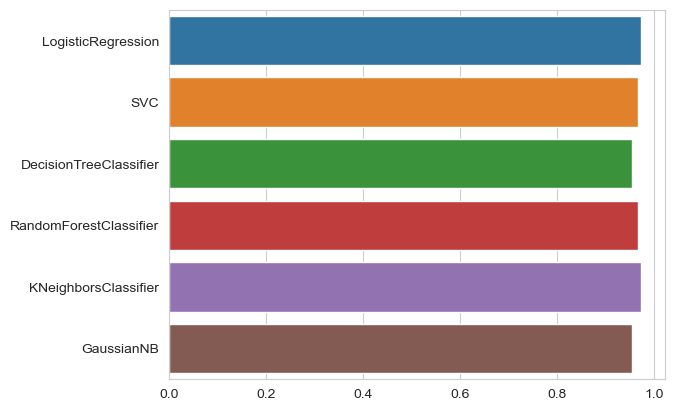

In [21]:
sns.barplot(x=predicted,y=key)
plt.show()

##### Here, Logistic Regression and KNeighbors Classifier showing Highest accuracy

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [24]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


### MODEL BUILDING

#### LOGISTIC REGRESSION

In [25]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{acc:.2f}")
print("Classification Report:\n",report)

Accuracy:1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### KNeighbors Classifier

In [26]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{acc:.2f}")
print("Classification Report:\n",report)

Accuracy:1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### CONCLUSION
Logistic regression and KNeighbors Classifier have the highest accuracy

In [27]:
### SAVE THE MODEL
import joblib
joblib.dump(model, 'irisclassification.pkl')

['irisclassification.pkl']